# Exploratory data analysis

Lest's take a look at the features available for the tracks in Spotify's API.
We are going to take the features from an existing playlist and see if it's
possible to infer the taste of the playlist owner.

In [1]:
## Import librarys
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Run project modules
%run ./src/__init__.py

## Playlist id

In order to extract the tracks' features of a playlist, I have created the
function "playlist_features".

This function needs some playlist id for creating a pandas dataframe that
contains a list of the tracks in the playlist and the features of every
track.

In this case, I will be using my personal playlist called
[Road](https://open.spotify.com/playlist/0JcCtpR2cHbmy70zwa81WV), a
playlist that I like to lisent to while driving.
To get some public playlist's id you will have to navigate to the
playlist page into Spotify web player and look into the URL. You
will see something like this:

* h<span>ttps://</span>open.spotify.com/playlist/[playlist_id]

In [2]:
# Some playlist id
playlist_id= '0JcCtpR2cHbmy70zwa81WV'

# get tracks' features
df_playlist = playlist_features(playlist_id)

# first look into the track's features
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           213 non-null    object 
 1   track_name         213 non-null    object 
 2   duration_ms        213 non-null    int64  
 3   explicit           213 non-null    bool   
 4   track_popularity   213 non-null    int64  
 5   acousticness       213 non-null    float64
 6   danceability       213 non-null    float64
 7   energy             213 non-null    float64
 8   instrumentalness   213 non-null    float64
 9   key                213 non-null    int64  
 10  liveness           213 non-null    float64
 11  loudness           213 non-null    float64
 12  mode               213 non-null    int64  
 13  speechiness        213 non-null    float64
 14  tempo              213 non-null    float64
 15  time_signature     213 non-null    int64  
 16  valence            213 non

## Numeric features description

### General describe

In [3]:
df_playlist.describe()

,duration_ms,track_popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_popularity,artist_followers,release_year
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000
mean,234071.981221,45.206573,0.172209,0.513108,0.712203,0.070757,5.046948,0.180475,-7.300221,0.680751,0.056045,127.395235,3.938967,0.579708,72.835681,7.502465e+06,1997.220657
std,66800.282172,29.970497,0.254792,0.141860,0.209846,0.186384,3.722402,0.137848,3.480022,0.467284,0.041814,30.236606,0.293053,0.220786,11.283911,9.716189e+06,13.373204
min,110093.000000,0.000000,0.000006,0.107000,0.042000,0.000000,0.000000,0.013600,-22.231000,0.000000,0.023500,70.843000,1.000000,0.066900,14.000000,4.200000e+01,1963.000000
25%,189226.000000,9.000000,0.005090,0.409000,0.558000,0.000002,2.000000,0.092600,-9.224000,0.000000,0.033600,103.183000,4.000000,0.400000,65.000000,9.057150e+05,1991.000000
50%,226240.000000,54.000000,0.040000,0.523000,0.769000,0.000179,4.000000,0.134000,-6.558000,1.000000,0.042100,125.412000,4.000000,0.592000,76.000000,3.401042e+06,2001.000000
75%,265640.000000,71.000000,0.212000,0.611000,0.889000,0.011600,9.000000,0.222000,-4.860000,1.000000,0.059200,152.510000,4.000000,0.754000,81.000000,1.118886e+07,2007.000000
max,517125.000000,89.000000,0.944000,0.929000,0.993000,0.882000,11.000000,0.854000,-1.746000,1.000000,0.319000,203.243000,4.000000,0.968000,91.000000,3.991931e+07,2018.000000


### Playlist footprint

By plotting the histograms of the numeric features,
we can get an idea if there is a marked tendency
in the taste of the playlist owner. That's what
I have called "playlist footprint"

Some features are not relevant from the
conceptual point of view. I don't think that key,
mode, tempo or time signature are important for
most people in the process of creating a playlist.
Maybe those features will be droped later in the
process.

In the case of my playlist we can observe yet some
tendecy in my taste:

I like energetic loud songs that are neither
so popular, acoustic, instrumental nor live. I
don't like speech in the songs. Furthermore, I like
popular artists. Maybe you can dance in some songs.
The valance footprint says that there are happy and
sad songs, there is not a preference. And finally,
There are song of every decade in my playlist, but with
some preference for 2000s songs.

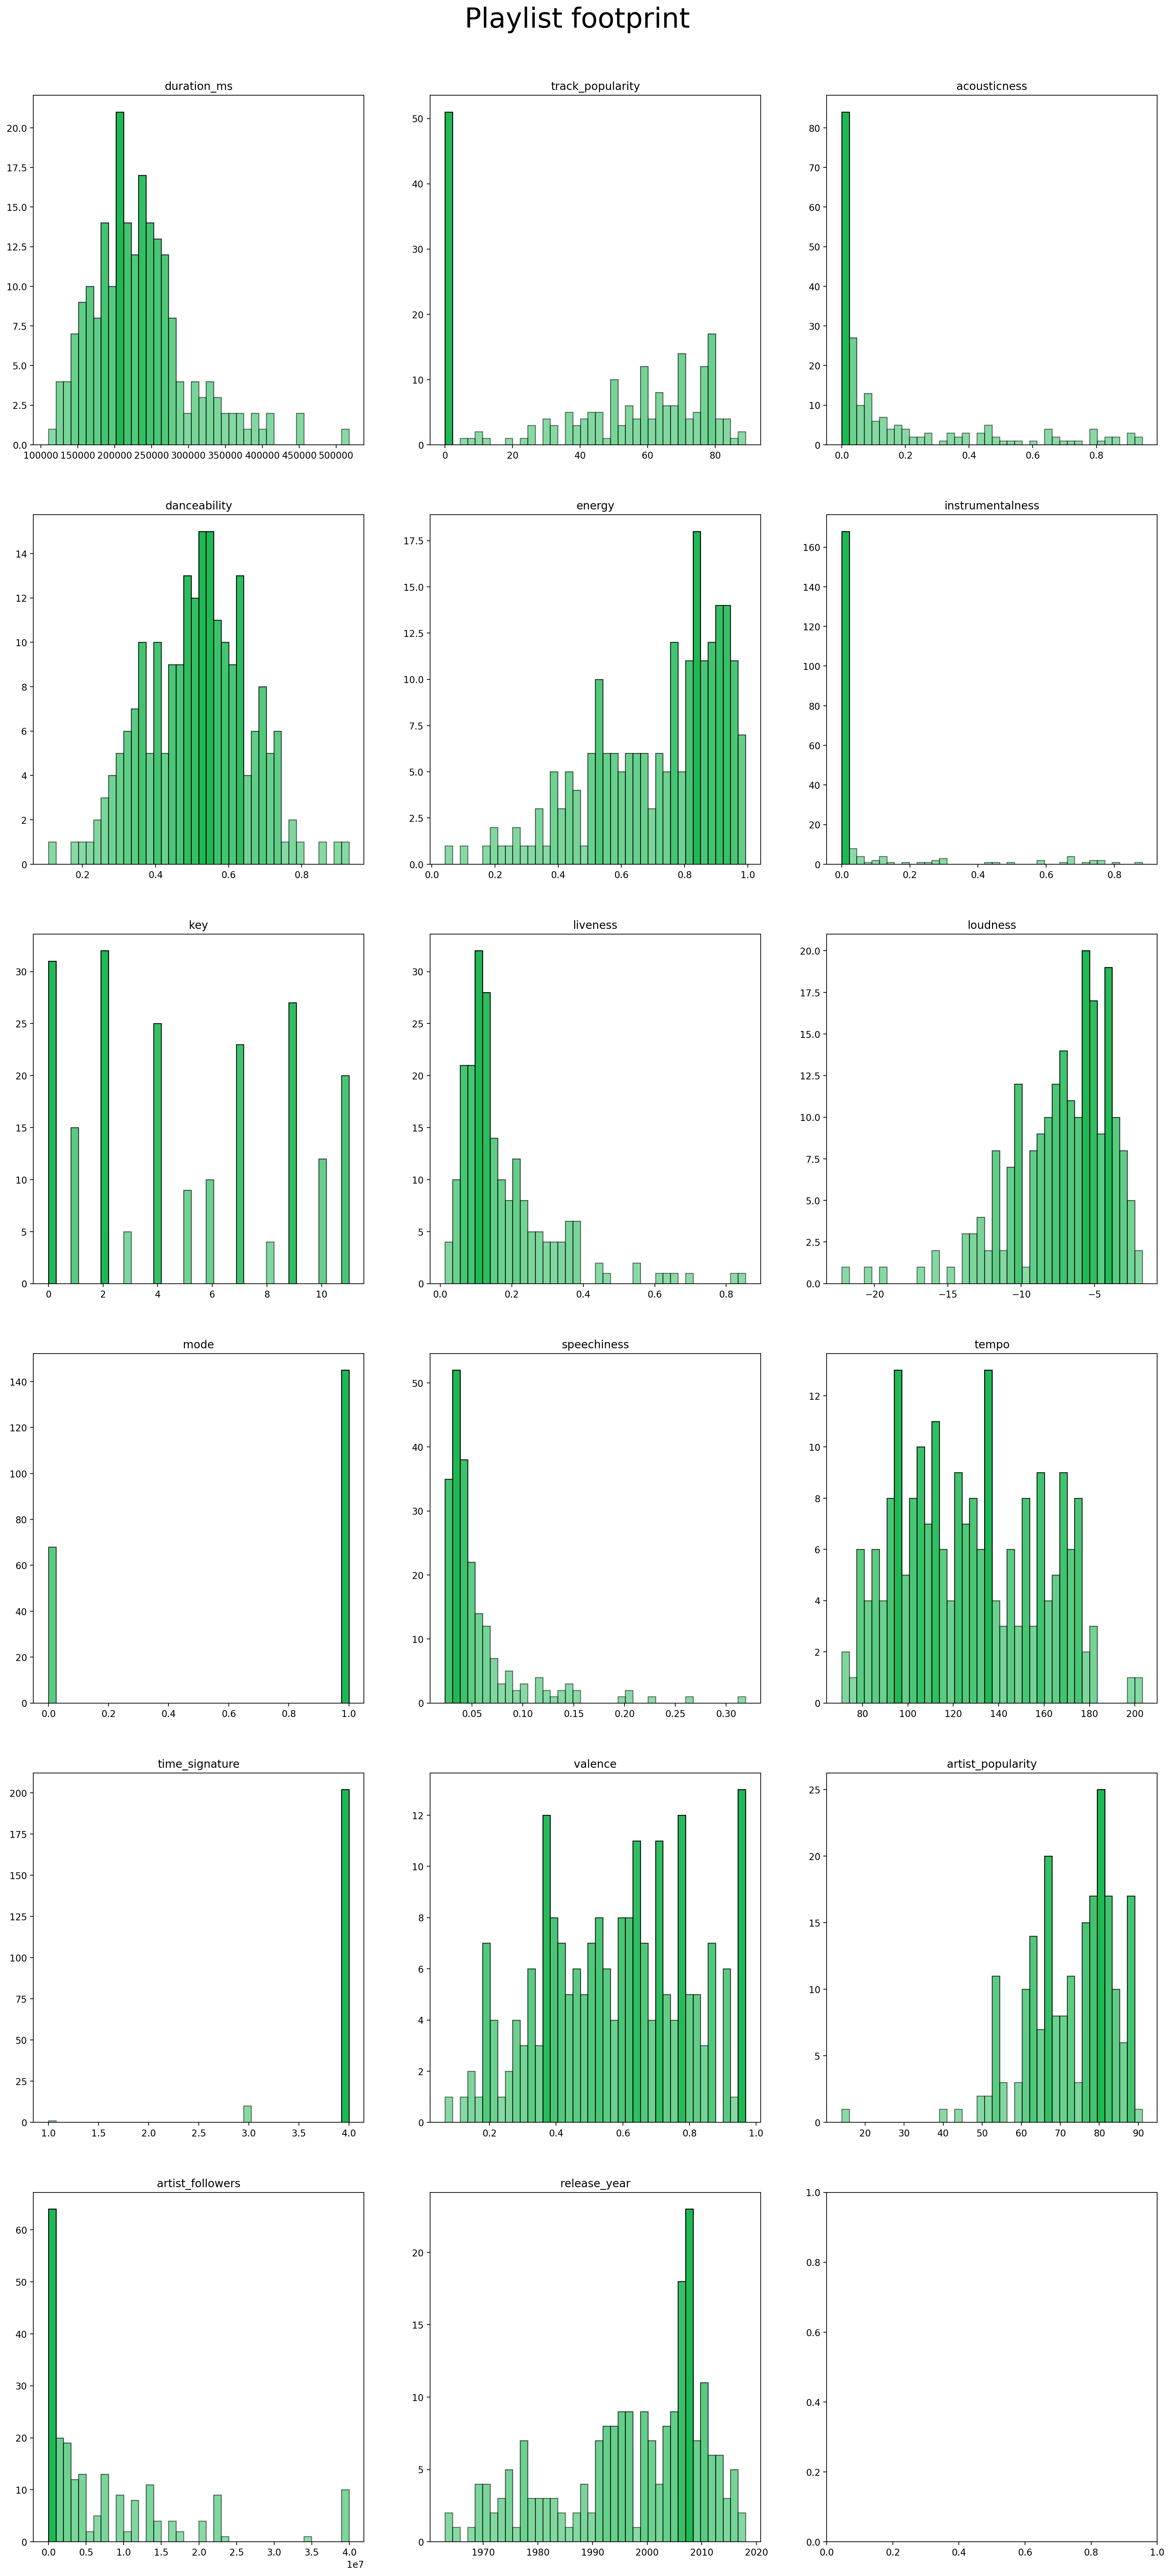

In [4]:
## Histograms of the numeric features
fig, axs = plt.subplots(6, 3, figsize=(22,45), dpi=200)
plt.suptitle('Playlist footprint', size=30)
plt.subplots_adjust(top=0.95)

# select numeric features
numeric_features = df_playlist.select_dtypes(include=np.number).columns
feature = 0

for i in range(6):
    for j in range(3):
        try:
            # plot an histogram for every feature
            n, bins, patches = axs[i,j].hist(df_playlist[numeric_features[feature]],
                                             bins=40, color='#1DB954', ec='black')
            axs[i,j].set_title(numeric_features[feature])
            feature += 1
            
            # adjust colormap
            n = n.astype('int')
            for k in range(len(patches)):
                alpha = 0.5 + (n[k]/(2*max(n)))
                patches[k].set_alpha(alpha)
        except:
            pass

## Categorical features description

In the dataframe there are some categorical features
and in this section we are going to analyze some of
them.

In [5]:
df_categorical = df_playlist[['artist_name','artist_genres','album_name','album_type']]

### Artists description

My playlist has 213 songs and yet 105 different
artists, 2 songs per artist on average but there
are many songs by Queen and Morphine.

In [6]:
total_artists = df_categorical['artist_name'].nunique()
counts = df_categorical['artist_name'].value_counts()
total_show = min(20,total_artists)

print(f"""There are {total_artists} different artists in the playlist.
        \nAn avarage of {int(counts.mean())} sogs per artist.
        \nThe top artists are:\n\n{counts[:total_show]}
        """)

There are 105 different artists in the playlist.
        
An avarage of 2 sogs per artist.
        
The top artists are:

Queen                 10
Morphine               8
Green Day              7
The Beatles            7
Foo Fighters           7
Led Zeppelin           6
The Cure               6
Beirut                 6
The Strokes            6
Iggy Pop               6
Oasis                  5
Nirvana                4
Pink Floyd             4
David Bowie            4
Arctic Monkeys         4
Metallica              4
Kings of Leon          3
Rancid                 3
Extremoduro            3
El Cuarteto De Nos     3
Name: artist_name, dtype: int64
        


### Genres description

There are 169 different genres in my playlist,
but they are mainly rock variants.

In [7]:
all_genres = df_categorical['artist_genres'].apply(pd.Series).stack().reset_index(drop=True)
total_genres = all_genres.nunique()
total_show = min(20,total_genres)

print(f"""There are {total_genres} different genres in the playlist
        \nThe principal genres are:
        \n{all_genres.value_counts()[:total_show]}
        """)

There are 169 different genres in the playlist
        
The principal genres are:
        
rock                 129
permanent wave        69
classic rock          51
alternative rock      49
modern rock           39
latin rock            25
rock en espanol       25
latin alternative     24
punk                  21
glam rock             20
indie rock            19
new wave              17
hard rock             16
album rock            16
garage rock           15
psychedelic rock      15
blues rock            14
alternative metal     12
britpop               12
indie pop             12
dtype: int64
        


### Albums description

In [8]:
total_albums = df_categorical['album_name'].nunique()
total_show = min(20,total_albums)

print(f"""There are {total_albums} different albums in the playlist
        \nPrincipal albums:
        \n{df_categorical['album_name'].value_counts()[:total_show]}
        """)

There are 178 different albums in the playlist
        
Principal albums:
        
Dookie                                                             5
Good                                                               3
Jazz                                                               3
The Rip Tide                                                       3
Cure for Pain                                                      3
Mothership (Remastered)                                            3
Disintegration (Deluxe Edition)                                    2
Metallica                                                          2
Nevermind (Remastered)                                             2
Janis Joplin: The Woodstock Experience                             2
Vida de Perros                                                     2
The Wall                                                           2
Room On Fire                                                       2
(What's The Story) M

### Album type count

In [9]:
df_categorical['album_type'].value_counts()

album    213
Name: album_type, dtype: int64